In [1]:
from scipy.special import comb
import numpy as np
import networkx as nx

### ER随机图的欧拉熵

In [2]:
N = 50

In [3]:
def euler_char_of_er_graph(N, p):
    ssum=0
    for k in range(1, N):
        ssum = ssum + (-1)**(k+1) * comb(N, k) * p**comb(k, 2) 
    return ssum 

In [4]:
euler_char_of_er_graph(N, 0.1)

-53.130088139890589

In [5]:
def euler_entropy(kalfa):
    return np.log(np.abs(kalfa))

In [6]:
euler_entropy(-25)

3.2188758248682006

In [7]:
p = np.arange(0, 1, 0.0001)

In [8]:
kalfa = euler_char_of_er_graph(N, p)

In [9]:
S_x  = euler_entropy(kalfa)

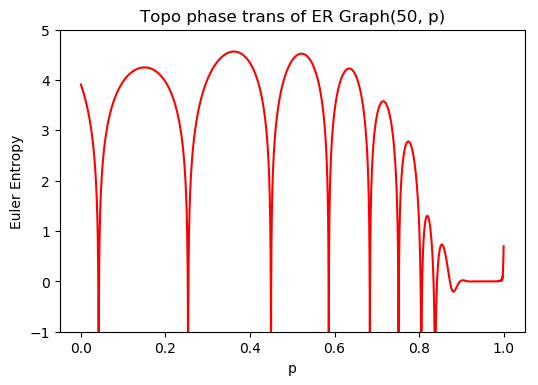

In [108]:
import matplotlib.pyplot as plt
plt.plot(p, S_x,'r-')
plt.xlabel('p')
plt.ylabel('Euler Entropy')
plt.ylim([-1, 5])
plt.title('Topo phase trans of ER Graph(50, p)')
plt.show()

### 随机图生成的Clique Complex 的贝蒂数

In [39]:
from mogutda import SimplicialComplex
N = 25
p = 0.2
G = nx.erdos_renyi_graph(N, p)
cliques = list(nx.clique.enumerate_all_cliques(G))
clique_complex = SimplicialComplex(cliques)

In [46]:
betti_number_0 = clique_complex.betti_number(0)

1

In [48]:
betti_number_1 = clique_complex.betti_number(1); betti_number_1

18

In [49]:
betti_number_2 = clique_complex.betti_number(2); betti_number_2

0

In [55]:
prange[0]

0.0

In [78]:
from mogutda import SimplicialComplex
N = 25
prange = np.arange(0, 0.7, 0.01)
betti_number = np.zeros((len(prange),4))
for i in range(len(prange)):
    G = nx.erdos_renyi_graph(N, prange[i])
    cliques = list(nx.clique.enumerate_all_cliques(G))
    clique_complex = SimplicialComplex(cliques)
    betti_number[i, 0] = clique_complex.betti_number(0)
    betti_number[i, 1] = clique_complex.betti_number(1)
    betti_number[i, 2] = clique_complex.betti_number(2)
    betti_number[i, 3] = clique_complex.betti_number(3)

In [79]:
N= 25
prange = np.arange(0, 0.7, 0.01)
kalfa = euler_char_of_er_graph(N, prange)
S_x  = euler_entropy(kalfa)

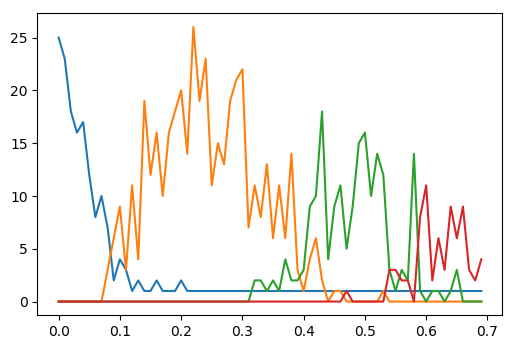

In [97]:
plt.rcParams['figure.dpi'] = 100
plt.plot(prange, betti_number)

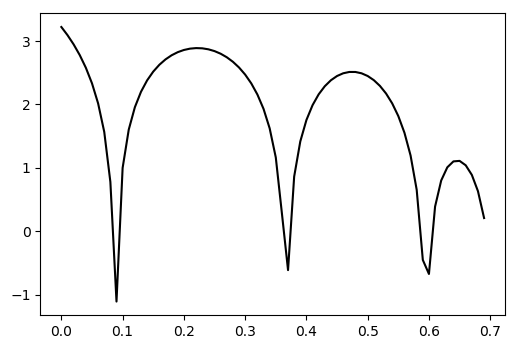

In [98]:
plt.plot(prange, S_x, 'k-')